# Exercise Set 11: Jacob Cardinal Tremblay, Charchit Kumar Sethi, and Sachin Pradeep Etakkepravan Thulicheri

Due: **10:00 27 June 2022**

Discussion: **13:00 1 July 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [1]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy import interpolate
from scipy.signal import savgol_filter

# 1. Interpolating a function of one variable **[50 points]**

Load the data in `sparse_1.dat`. You will try to find a smooth the data using interpolation.

**a)** Plot the data. Can you identify the trend? **10 points**

Text(0, 0.5, 'y')

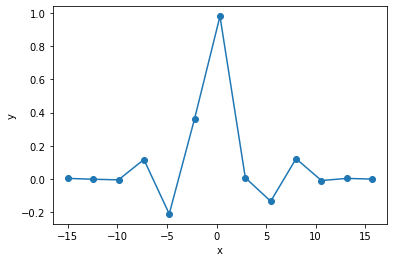

In [2]:
# read the data
sparse=np.loadtxt('sparse_1dat.sec')
x=sparse[:,0] # x
y=sparse[:,1] # y
# plotting the data
plt.plot(x,y,marker='o') 
plt.xlabel('x')
plt.ylabel('y')

- The points appear to follow out damping waves. It could also possibly have a somewhat Gaussian shape.

**b)** Smooth the data by interpolating the data at a larger number of $x$-coordinates. You can use the `interp1d` method in `scipy.interpolate` using the linear method (or interpolate the points manually). Plot your interpolated points with the original data points **20 points**

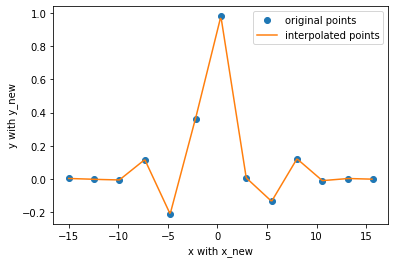

In [3]:
# interpolation for the data
k = interpolate.interp1d(x,y,kind='linear')
# creating new interpolation points
x_new = np.arange(x.min(),x.max(), 0.1) 
# corresponding value to the new interpolation points
y_new = k(x_new) 
# plotting the new points with the original data points
plt.plot(x,y, 'o', x_new, y_new, '-') 
plt.xlabel('x with x_new')
plt.ylabel('y with y_new')
plt.legend(['original points','interpolated points']);

**c)** Test a few other methods ('nearest', 'zero', 'slinear', 'quadratic', and 'cubic') to interpolate the data. Compare them to the linear method. Which appears to be most accurate? Can you identify the underlying function? **20 points**

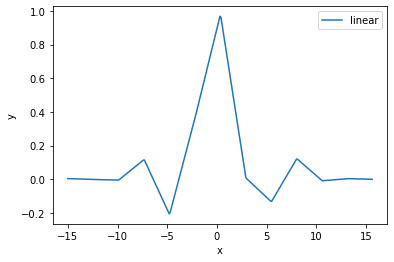

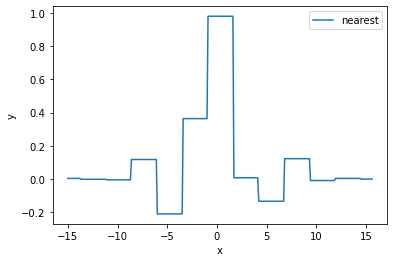

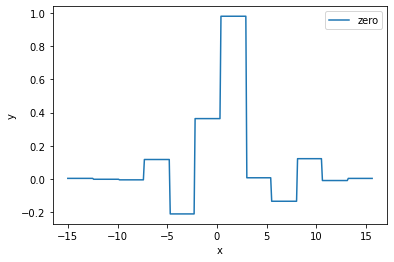

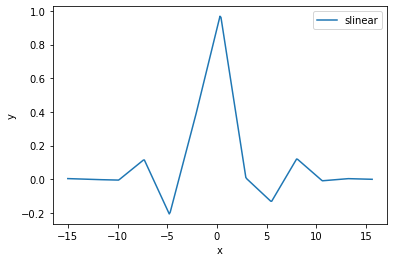

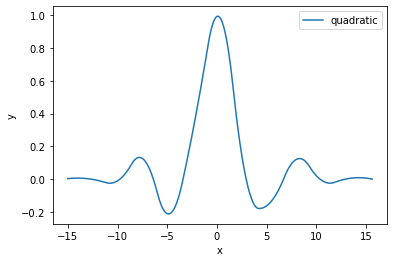

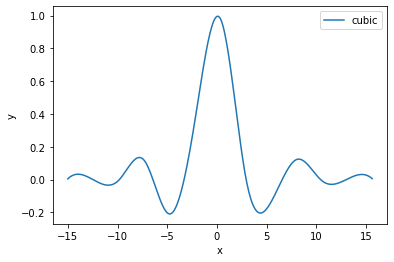

In [4]:
# interpolate of the data points with different methods
few_methods=['linear','nearest', 'zero', 'slinear', 'quadratic', 'cubic']
for i in few_methods:
    l=interpolate.interp1d(x,y,kind=i)
    x_All= np.arange(x.min(),x.max(), 0.1)
    fig,ax = plt.subplots()
    ax.plot(x_All,l(x_All),label=i)
    ax.set_xlabel('x');ax.set_ylabel('y')
    ax.legend()  

- The cubic technique has all the earmarks of being the most dependable one. The underlying function is sin(x)/x.

# 2. Smoothing a noisy signal **[50 points]**

Load the data in `data_noisy.dat`. Here you will find columns for $x$, $y_1$, and $y_2$. You will investigate how well the data can be smoothed using different filters.

**a)** Apply a moving-average filter to both datasets with $10$- and $20$-point filters. Compare this to $10$- and $20$-point triangular smoothing of both datasets. Discuss the difference between these methods, and how accurate is the interpolated data. Plot any filtered data with the original dataset. **20 points**

In [5]:
#Read in the data
df = pd.read_table('data_noisydat.sec', delim_whitespace=True, skiprows=1)
df.columns=('x','y1','y2')

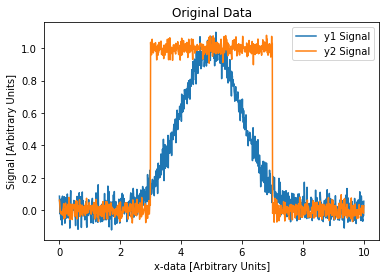

In [6]:
#PLot the y1 and y2 data
plt.plot(df.x,df.y1, label='y1 Signal')
plt.plot(df.x,df.y2, label='y2 Signal')
plt.ylabel('Signal [Arbitrary Units]')
plt.xlabel('x-data [Arbitrary Units]')
plt.title('Original Data')
plt.legend()
plt.show()

In [7]:
# Compute Moving Average smoothing (centering not specified in question so we set to true)
roll10 = df[['y1', 'y2']].rolling(10, center=True).mean()
roll20 = df[['y1', 'y2']].rolling(20, center=True).mean()

In [8]:
#Triangular Smoothing function
def smoothTriangle(data, window):
    triangle=np.concatenate((np.arange(window + 1), np.arange(window)[::-1])) # up then down
    smoothed=[]

    for i in range(window, len(data) - window * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(window + window/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

In [9]:
#Calling the triangular smoothing function for the appropriate data and parameter
trig10_y1 = smoothTriangle(np.array(df.y1), 10) 
trig20_y1 = smoothTriangle(np.array(df.y1), 20) 
trig10_y2 = smoothTriangle(np.array(df.y2), 10) 
trig20_y2 = smoothTriangle(np.array(df.y2), 20) 

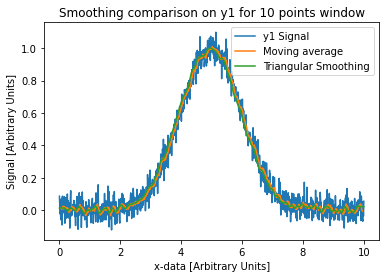

In [10]:
#Plot triangular smoothing and moving average for y1 and 10 point window
plt.plot(df.x,df.y1, label='y1 Signal')
plt.plot(df.x,roll10.y1, label='Moving average')
plt.plot(df.x,trig10_y1, label='Triangular Smoothing')
plt.ylabel('Signal [Arbitrary Units]')
plt.xlabel('x-data [Arbitrary Units]')
plt.legend()
plt.title("Smoothing comparison on y1 for 10 points window")
plt.show()

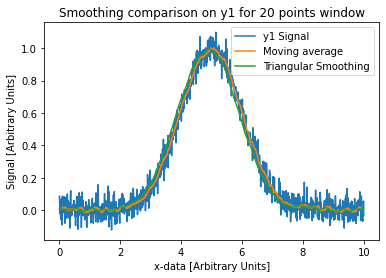

In [11]:
#Plot triangular smoothing and moving average for y1 and 20 point window
plt.plot(df.x,df.y1, label='y1 Signal')
plt.plot(df.x,roll20.y1, label='Moving average')
plt.plot(df.x,trig20_y1, label='Triangular Smoothing')
plt.ylabel('Signal [Arbitrary Units]')
plt.xlabel('x-data [Arbitrary Units]')
plt.legend()
plt.title("Smoothing comparison on y1 for 20 points window")
plt.show()

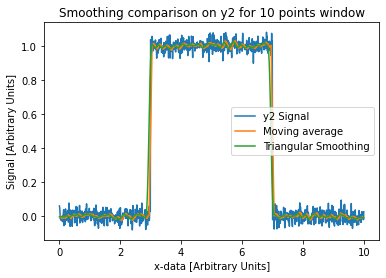

In [12]:
#Plot triangular smoothing and moving average for y2 and 10 point window
plt.plot(df.x,df.y2, label='y2 Signal')
plt.plot(df.x,roll10.y2, label='Moving average')
plt.plot(df.x,trig10_y2, label='Triangular Smoothing')
plt.ylabel('Signal [Arbitrary Units]')
plt.xlabel('x-data [Arbitrary Units]')
plt.legend()
plt.title("Smoothing comparison on y2 for 10 points window")
plt.show()

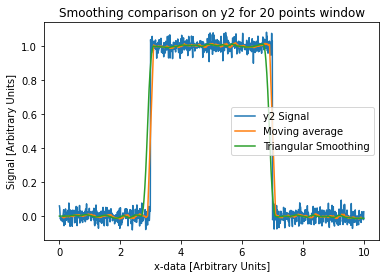

In [13]:
#Plot triangular smoothing and moving average for y2 and 20 point window
plt.plot(df.x,df.y2, label='y2 Signal')
plt.plot(df.x,roll20.y2, label='Moving average')
plt.plot(df.x,trig20_y2, label='Triangular Smoothing')
plt.ylabel('Signal [Arbitrary Units]')
plt.xlabel('x-data [Arbitrary Units]')
plt.legend()
plt.title("Smoothing comparison on y2 for 20 points window")
plt.show()

It is hard to determine visually if the trangular smoothing is better than the moving average. Theoretically the moving average removes the boundary data wheras the triangular moving average is able to handle the boundaries without removing any data. This means that the moving average is technically more accurate to the original data, however it is not as well smoothed. However, the triangualar smoothing places more of an emphasis on the middle of the window, while placing almost no emphasis near the edges of the window. This means that if this effect is more important, then the moving average will be smoothed more, and therefore the triangular smoothing will retain more information. It is important to note that the more the data is smoothed, the more information we lose.

We can also see that in both cases the 20 point window has better smoothing than the 10 point window, which is expected as it is considering more points over which to smooth.

Source: https://www.adinstruments.com/support/knowledge-base/what-are-advantages-and-disadvantages-various-smoothing-functions-available

**b)** Apply the Savitzky-Golay filter to both datasets and plot them. How does this method compare to the previous ones? **30 points**

In [14]:
#define function for Savitzky-Golay filter
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [15]:
#Call function for Savitzky-Golay filter
sg10_y1 = savitzky_golay(np.array(df.y1), 10, 3) # window size 10, polynomial order 3
sg20_y1 = savitzky_golay(np.array(df.y1), 20, 3) # window size 20, polynomial order 3
sg10_y2 = savitzky_golay(np.array(df.y2), 10, 3) # window size 10, polynomial order 3
sg20_y2 = savitzky_golay(np.array(df.y2), 20, 3) # window size 20, polynomial order 3

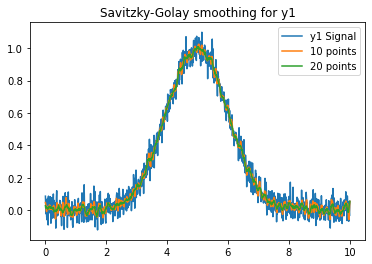

In [16]:
#Plot Savitzky-Golay smoothing and moving average for y1, 10 and 20 point window
plt.plot(df.x,df.y1, label='y1 Signal')
plt.plot(df.x,sg10_y1, label='10 points')
plt.plot(df.x,sg20_y1, label='20 points')
plt.legend()
plt.title("Savitzky-Golay smoothing for y1")
plt.show()

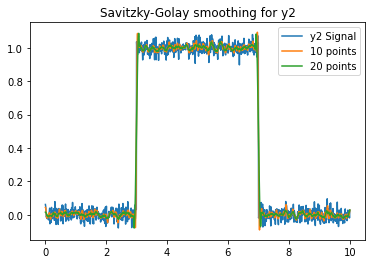

In [17]:
#Plot Savitzky-Golay smoothing and moving average for y2, 10 and 20 point window
plt.plot(df.x,df.y2, label='y2 Signal')
plt.plot(df.x,sg10_y2, label='10 points')
plt.plot(df.x,sg20_y2, label='20 points')
plt.legend()
plt.title("Savitzky-Golay smoothing for y2")
plt.show()

We can see that this method is able to smooth the data, however, it is not as good as the moving average or the triangular moving average. We do see however that here as well, the 20 point window is able to smooth better than the 10 point window.